<h1 style="text-align:center">kNN Classification for Fraud Data</span>

## Assignment Notice
Build a classification model by using the kNN algorithm for the fraud dataset
- You need to find the best performance level for your model
- Apply the appropriate and best resampling method for your model
- Adjust kNN parameters and show your choice of parameters is the optimal one
***

**Contents**
1. Preparing & Refining Data
2. Training Model (with default options)
3. Training Model with Oversampling
4. Training Model with Undersampling
5. Training Model with SMOTE
6. Model Comparison
7. Conclusion

## 1. Preparing & Refining Data

In [2]:
import matplotlib.pyplot        as      plt
import numpy                    as      np
import pandas                   as      pd
from imblearn.over_sampling     import  RandomOverSampler
from imblearn.over_sampling     import  BorderlineSMOTE
from imblearn.over_sampling     import  SMOTE
from imblearn.over_sampling     import  SMOTENC
from imblearn.under_sampling    import  RandomUnderSampler
from sklearn.metrics            import  ConfusionMatrixDisplay
from sklearn.metrics            import  confusion_matrix
from sklearn.model_selection    import  train_test_split
from sklearn.neighbors          import  KNeighborsClassifier

In [3]:
df = pd.read_csv('../data/2_fraud_ex.csv')

In [4]:
df.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'}, inplace=True)
df.drop(columns=['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], inplace=True)
df['type'] = df['type'].apply(lambda x: { 
        'CASH_IN': 0,
        'CASH_OUT': 1, 
        'PAYMENT': 2, 
        'DEBIT': 3
    }.get(x, 4))                # get 4 if x not in dict.keys
df.head()

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,2,11668.14,41554.0,29885.86,0.0,0.0,0


In [5]:
_, df_small, _, _ = train_test_split(df, df['isFraud'], test_size=0.1, stratify=df['isFraud'])
df_X = df_small.drop(columns=['isFraud'])
df_y = df_small['isFraud']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, stratify=df_y)

In [6]:
df_summary = pd.DataFrame(
    np.column_stack((y_train.value_counts().to_numpy(), y_test.value_counts().to_numpy())),
    index=['Non-fraud', 'Fraud']
)
df_summary.rename(columns={0: 'Training data', 1: 'Test data'}, inplace=True)
df_summary['Total'] = df_summary['Training data'] + df_summary['Test data']
df_summary.style.set_caption('Number of fraud & non-fraud data')

,Training data,Test data,Total
Non-fraud,476580,158861,635441
Fraud,616,205,821


In [7]:
def print_score(clf: KNeighborsClassifier, x_train, y_train, x_test, y_test):
    print('< Score >')
    print('Training data:', clf.score(x_train, y_train))    # Should be good, it's training data!
    print('Test data:', clf.score(x_test, y_test))          # But what about this?

def show_matrix(clf: KNeighborsClassifier, x_test, y_test):
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test,
        display_labels=['Non-Fraud', 'Fruad'])
    plt.show()

def get_matrix_value(clf: KNeighborsClassifier, x_test, y_test) -> (int, int, int, int):
    tn, fp, fn, tp = confusion_matrix(
        y_test, clf.predict(x_test), labels=clf.classes_).ravel()
    return (tn, fp, fn, tp)

## 2. Training Model (with default options)

- Hyper parameter(s): default
- Resampling: not applied

< Score >
Training data: 0.9994048567045826
Test data: 0.9991890158802007


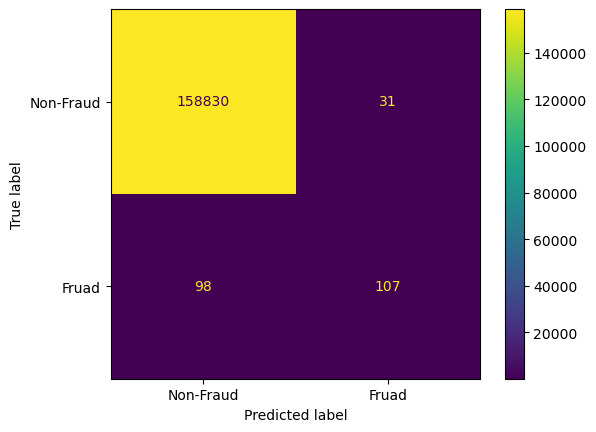

In [8]:
clf = KNeighborsClassifier().fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

스코어만 보면 과대적합 / 과소적합도 없고, 훌륭한 점수를 보여줌.\
그러나 아래 그래프를 보면 이야기가 달라짐.\
제1사분면(1종오류)과 제3사분면(2종오류)은 모델의 예측 중 틀린 예측의 수.\
Non fraud 데이터는 잘 맞추지만 (158830:31) Fraud 데이터는 거의 맞추지 못함. (107:98)

## 3. Training Model with Oversampling

### 3-1. Strategy: Minority

- Hyper parameter(s): default
- Resampling: Oversampling - Minority

,isFraud
0,476580
1,476580


< Score >
Training data: 0.9994677239540986
Test data: 0.9993713301396905


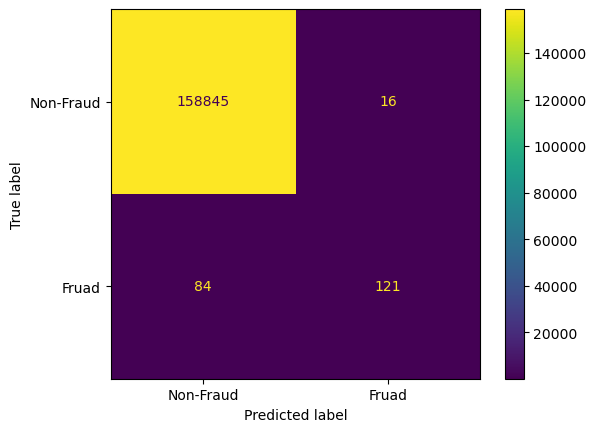

In [22]:
ros = RandomOverSampler(sampling_strategy='minority')
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
display(pd.DataFrame(y_over_train.value_counts()))

clf = KNeighborsClassifier().fit(X_over_train, y_over_train) 
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

기본형 모델보단 낫지만, 유의미한 차이는 보이지 않음.

### 3-2. Strategy: 0.5

- Hyper parameter(s): default
- Resampling: Oversampling - 0.5

,isFraud
0,476580
1,238290


< Score >
Training data: 0.9991932036312123
Test data: 0.9982585844869425


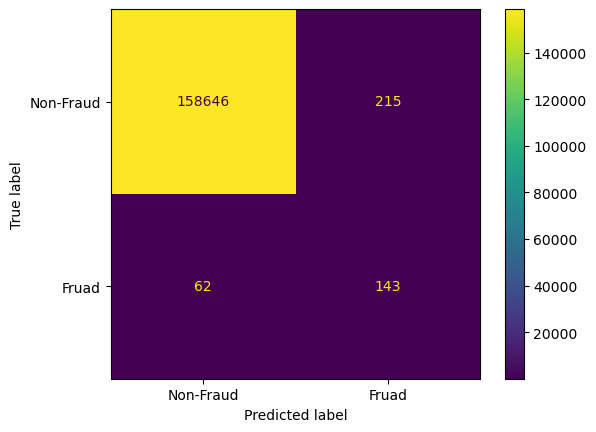

In [32]:
ros = RandomOverSampler(sampling_strategy=0.5)
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
display(pd.DataFrame(y_over_train.value_counts()))

clf = KNeighborsClassifier().fit(X_over_train, y_over_train) 
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

Fraud 데이터의 예측이 개선됨.

### 3-3. Strategy: Auto

- Hyper parameter(s): default
- Resampling: Oversampling - auto

,isFraud
0,476580
1,476580


< Score >
Training data: 0.9991932036312123
Test data: 0.9982585844869425


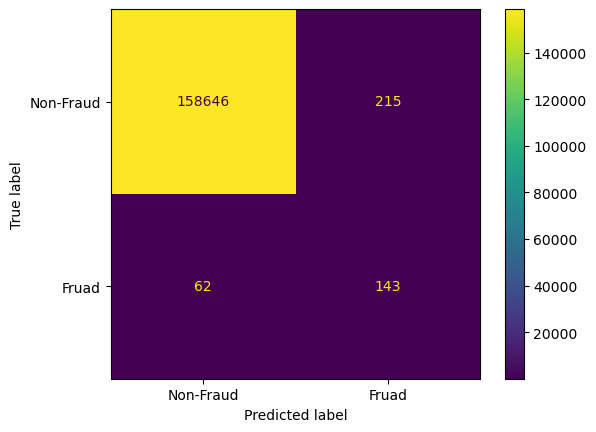

In [34]:
ros = RandomOverSampler(sampling_strategy='auto')
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
display(pd.DataFrame(y_over_train.value_counts()))

clf = KNeighborsClassifier().fit(X_over_train, y_over_train) 
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

위와 동일함.

## 4. Training Model with Undersampling

### 4-1. Strategy: majority

- Hyper parameter(s): default
- Resampling: Undersampling - majority

,isFraud
0,616
1,616


< Score >
Training data: 0.918752462300606
Test data: 0.920008046974212


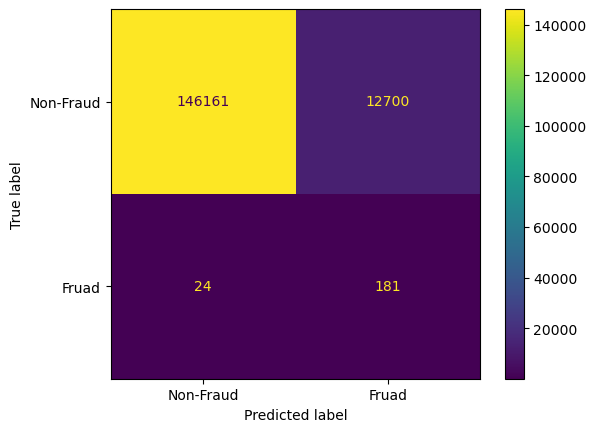

In [37]:
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
display(pd.DataFrame(y_under_train.value_counts()))

clf = KNeighborsClassifier().fit(X_under_train, y_under_train) 
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

Fruad 데이터의 예측이 크게 개선되었으나,\
Non-Fraud 데이터의 예측이 더 안 좋아짐.

### 4-2. Strategy: 0.5

- Hyper parameter(s): default
- Resampling: Undersampling - 0.5

,isFraud
0,1232
1,616


< Score >
Training data: 0.95726493935406
Test data: 0.957765958784404


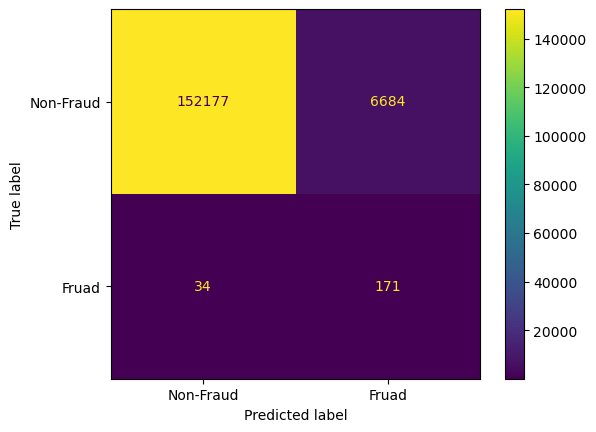

In [38]:
rus = RandomUnderSampler(sampling_strategy=0.5)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
display(pd.DataFrame(y_under_train.value_counts()))

clf = KNeighborsClassifier().fit(X_under_train, y_under_train) 
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

위 모델에 비해 균형을 조금 갖춘 편. 그러나 만족스럽진 않음.

### 4-3. Strategy: Auto

- Hyper parameter(s): default
- Resampling: Undersampling - Auto

,isFraud
0,616
1,616


< Score >
Training data: 0.9351251896495361
Test data: 0.9363534633422604


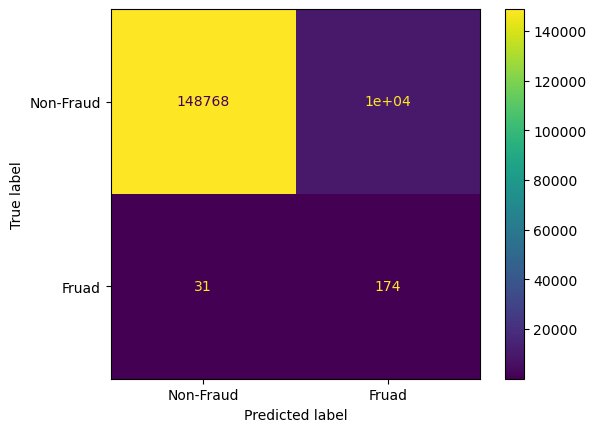

In [39]:
rus = RandomUnderSampler(sampling_strategy='auto')
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
display(pd.DataFrame(y_under_train.value_counts()))

clf = KNeighborsClassifier().fit(X_under_train, y_under_train) 
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

위 모델보다 더 나빠짐.

## 5. Training Model with SMOTE

### 5-1. SMOTE

- Hyper parameter(s): default
- Resampling: SMOTE

,isFraud
0,476580
1,476580


< Score >
Training data: 0.9936734591237144
Test data: 0.9912677756403002


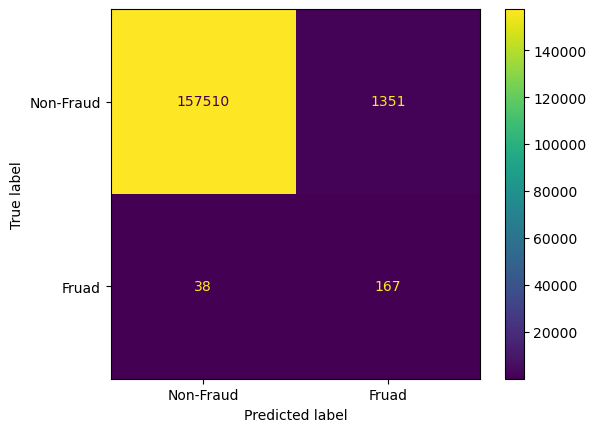

In [40]:
sm = SMOTE()
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)
display(pd.DataFrame(y_sm_train.value_counts()))

clf = KNeighborsClassifier().fit(X_sm_train, y_sm_train)
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

오버샘플링 / 언더샘플링에 비해 개선됨.

### 5-2. SMOTE-NC

- Hyper parameter(s): default
- Resampling: SMOTE-NC

,isFraud
0,476580
1,476580


< Score >
Training data: 0.9936294520490532
Test data: 0.9912677756403002


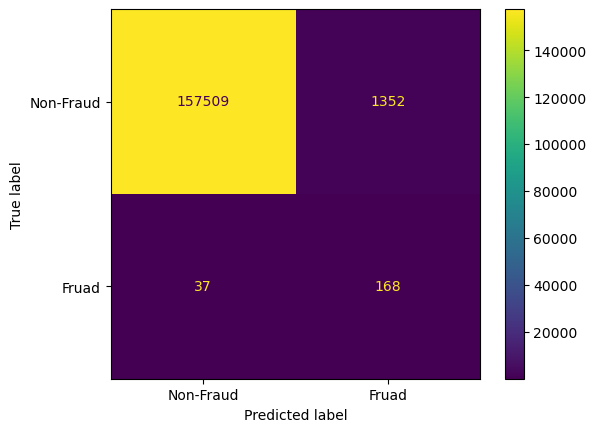

In [41]:
sm = SMOTENC(categorical_features=[0]) #sampling_strategy=0.3, k_neighbors=8
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)
display(pd.DataFrame(y_sm_train.value_counts()))

clf = KNeighborsClassifier().fit(X_sm_train, y_sm_train)
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

SMOTE와 SMOTE-NC 간엔 큰 차이가 존재하지 않음.

### 5-3. Borderline-SMOTE

- Hyper parameter(s): default
- Resampling: Borderline-SMOTE1

,isFraud
0,476580
1,476580


< Score >
Training data: 0.9977870728170395
Test data: 0.9967309167263902


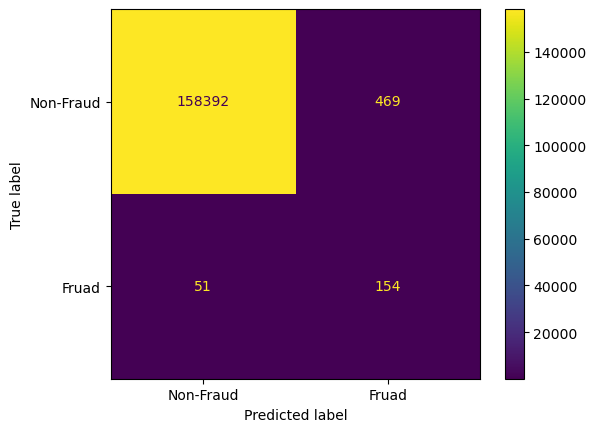

In [42]:
sm = BorderlineSMOTE(kind='borderline-1') #sampling_strategy=0.3
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)
display(pd.DataFrame(y_sm_train.value_counts()))

clf = KNeighborsClassifier().fit(X_sm_train, y_sm_train)
print_score(clf, X_train, y_train, X_test, y_test)
show_matrix(clf, X_test, y_test)

## 6. Over- vs. Undersampling Comparison

### 6-1. Oversampling method comparison

In [59]:
o_strategy = ['minority', 0.5, 'auto']
neighbors = [1, 3, 5, 7, 9, 11, 13]
over_nf, over_f = [[], [], []], [[], [], []]
over_train_score, over_test_score = [[], [], []], [[], [], []]

for i in range(3):
    ros = RandomOverSampler(sampling_strategy=o_strategy[i])
    X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
    for k in neighbors:
        clf = KNeighborsClassifier(n_neighbors=k).fit(X_over_train, y_over_train)
        over_train_score[i].append(clf.score(X_train, y_train))
        over_test_score[i].append(clf.score(X_test, y_test))
        a, b, c, d = get_matrix_value(clf, X_test, y_test)
        over_nf[i].append(b / (a + b))
        over_f[i].append(c / (c + d))

print(over_nf)
print(over_f)
print(over_train_score)
print(over_test_score)

[[0.00047211083903538314, 0.0009379268668836279, 0.0012526674262405499, 0.0016429457198431333, 0.0019891603351357475, 0.0023479645728026388, 0.002650115509785284], [0.00047211083903538314, 0.0009379268668836279, 0.0012526674262405499, 0.0016429457198431333, 0.0019891603351357475, 0.0023479645728026388, 0.002650115509785284], [0.00047211083903538314, 0.0009379268668836279, 0.0012526674262405499, 0.0016429457198431333, 0.0019891603351357475, 0.0023479645728026388, 0.002650115509785284]]
[[0.44878048780487806, 0.40487804878048783, 0.3804878048780488, 0.36585365853658536, 0.3463414634146341, 0.33658536585365856, 0.32682926829268294], [0.44878048780487806, 0.40487804878048783, 0.3804878048780488, 0.36585365853658536, 0.3463414634146341, 0.33658536585365856, 0.32682926829268294], [0.44878048780487806, 0.40487804878048783, 0.3804878048780488, 0.36585365853658536, 0.3463414634146341, 0.33658536585365856, 0.32682926829268294]]
[[1.0, 0.999522208903679, 0.9991303363816965, 0.9987468461596493, 0.

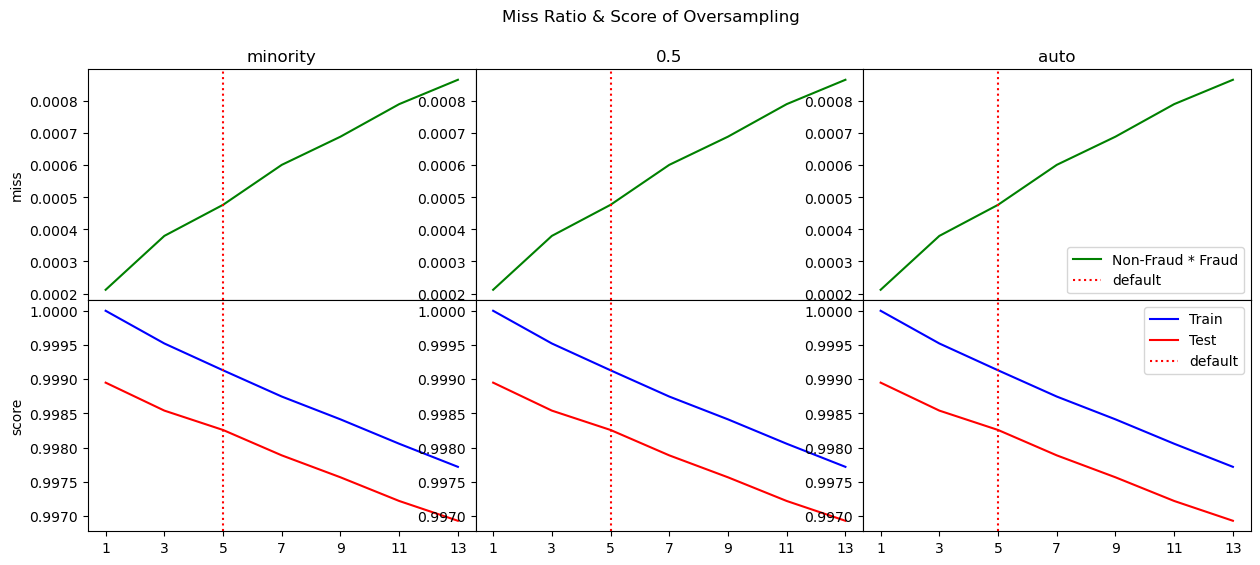

In [60]:
over_t = [[x * y for x, y in zip(over_nf[n], over_f[n])] for n in range(3)]

fig, axes = plt.subplots(2, 3, sharex=True, figsize=(15, 6))
for i in range(3):
    axes[0, i].plot(over_t[i], 'g', label='Non-Fraud * Fraud')
    axes[0, i].set_title(str(o_strategy[i]))
    axes[0, i].set_xticks([*range(len(neighbors))])
    axes[0, i].set_xticklabels(neighbors)
    axes[0, i].axvline(x=2, color='r', linestyle=':', label='default')
for i in range(3):
    axes[1, i].plot(over_train_score[i], 'b', label='Train')
    axes[1, i].plot(over_test_score[i], 'r', label='Test')
    axes[1, i].set_xticks([*range(len(neighbors))])
    axes[1, i].set_xticklabels(neighbors)
    axes[1, i].axvline(x=2, color='r', linestyle=':', label='default')

fig.suptitle('Miss Ratio & Score of Oversampling')
axes[0, 1].set_xlabel('n_neighbors')
axes[0, 0].set_ylabel('miss')
axes[1, 0].set_ylabel('score')
axes[0, 2].legend()
axes[1, 2].legend()

plt.subplots_adjust(wspace=0, hspace=0)

**오버샘플링의 Miss Ratio와 Score**

여기서 Miss Ratio란, (실제 Non-Fraud 데이터 중 Fraud로 잘못 예상한 데이터의 비율)×(실제 Fraud 데이터 중 Non-Fraud로 잘못 예상한 데이터의 비율)이다.\

x축은 ```n_neighbors```의 수, y축은 각각 Miss Ratio와 Score이다.\
오버샘플링의 strategy인 minority, 0.5, auto는 차이가 없으며, 우상향하는 Miss Ratio와 우하향하는 Score도 모습이 같다.

***

### 6-2. Undersampling method comparison

In [57]:
u_strategy = ['majority', 0.5, 'auto']
under_nf, under_f = [[], [], []], [[], [], []]
under_train_score, under_test_score = [[], [], []], [[], [], []]

for i in range(3):
    rus = RandomUnderSampler(sampling_strategy=u_strategy[i])
    X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
    for k in neighbors:
        clf = KNeighborsClassifier(n_neighbors=k).fit(X_under_train, y_under_train)
        under_train_score[i].append(clf.score(X_train, y_train))
        under_test_score[i].append(clf.score(X_test, y_test)) 
        a, b, c, d = get_matrix_value(clf, X_test, y_test)
        under_nf[i].append(b / (a + b))
        under_f[i].append(c / (c + d))
        
print(under_nf)
print(under_f)
print(under_train_score)
print(under_test_score)

[[0.07724992288856296, 0.08387835906861973, 0.07769055967166265, 0.07162236168726119, 0.06950101031719554, 0.0695765480514412, 0.07121949377128434], [0.051661515412845194, 0.04755100370764379, 0.044290291512706075, 0.04057005810110726, 0.0383165156961117, 0.038228388339491756, 0.03878233172395994], [0.08638998873228798, 0.09213715134614538, 0.09122440372401029, 0.08430011141815802, 0.07530482623173718, 0.07210706214867085, 0.07043893718407916]]
[[0.0975609756097561, 0.11707317073170732, 0.15121951219512195, 0.1902439024390244, 0.1902439024390244, 0.2, 0.2048780487804878], [0.1073170731707317, 0.16097560975609757, 0.2, 0.22926829268292684, 0.23902439024390243, 0.23902439024390243, 0.24878048780487805], [0.11219512195121951, 0.0975609756097561, 0.16097560975609757, 0.1902439024390244, 0.1902439024390244, 0.2048780487804878, 0.2048780487804878]]
[[0.9228954140437053, 0.9157914148484061, 0.9225286884215291, 0.9291297496207009, 0.9313741104284193, 0.9313929706032741, 0.9299889353640852], [0

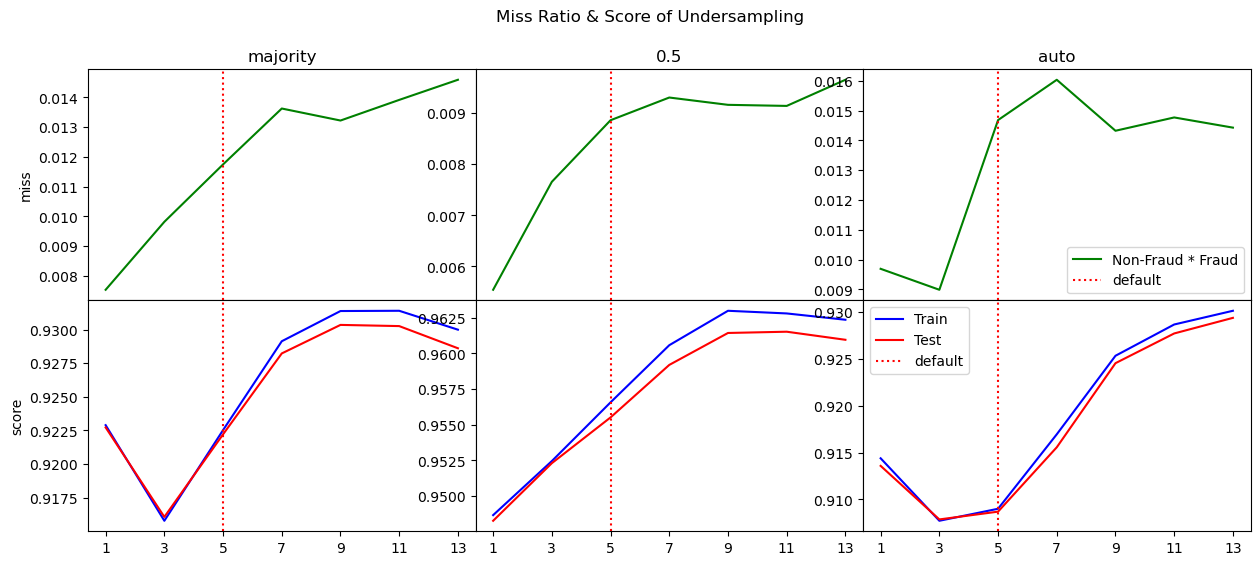

In [58]:
under_t = [[x * y for x, y in zip(under_nf[n], under_f[n])] for n in range(3)]

fig, axes = plt.subplots(2, 3, sharex=True, figsize=(15, 6))
for i in range(3):
    axes[0, i].plot(under_t[i], 'g', label='Non-Fraud * Fraud')
    axes[0, i].set_title(str(u_strategy[i]))
    axes[0, i].set_xticks([*range(len(neighbors))])
    axes[0, i].set_xticklabels(neighbors)
    axes[0, i].axvline(x=2, color='r', linestyle=':', label='default')
for i in range(3):
    axes[1, i].plot(under_train_score[i], 'b', label='Train')
    axes[1, i].plot(under_test_score[i], 'r', label='Test')
    axes[1, i].set_xticks([*range(len(neighbors))])
    axes[1, i].set_xticklabels(neighbors)
    axes[1, i].axvline(x=2, color='r', linestyle=':', label='default')

fig.suptitle("Miss Ratio & Score of Undersampling")
axes[0, 1].set_xlabel("n_neighbors")
axes[0, 0].set_ylabel("miss")
axes[1, 0].set_ylabel('score')
axes[0, 2].legend()
axes[1, 2].legend()

plt.subplots_adjust(wspace=0, hspace=0)

**언더샘플링의 Miss Ratio와 Score**

오버샘플링에 비해 Miss Ratio도 크게 오르고, 무엇보다 모델의 점수가 크게 떨어짐.\
특히 minority / auto로 둔 경우 오버샘플링에 비해 최대 약 10% 가량의 성능 하락이 발생함.

***

### 6-3. SMOTE vs SMOTE-NC vs BorderlineSMOTE

In [52]:
smote_nf, smote_f = [[], [], []], [[], [], []]
smote_train_score, smote_test_score = [[], [], []], [[], [], []]
s_strategy = ['SMOTE', 'SMOTE-NC', 'Borderline-SMOTE']

sm_list = [SMOTE(), SMOTENC(categorical_features=[0]), BorderlineSMOTE(kind='borderline-1')]


for i in range(3):
    sm = sm_list[i]
    X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)
    for k in neighbors:
        clf = KNeighborsClassifier(n_neighbors=k).fit(X_sm_train, y_sm_train)
        a, b, c, d = get_matrix_value(clf, X_test, y_test)
        smote_nf[i].append(b / (a + b))
        smote_f[i].append(c / (c + d))
        smote_train_score[i].append(clf.score(X_train, y_train))
        smote_test_score[i].append(clf.score(X_test, y_test))

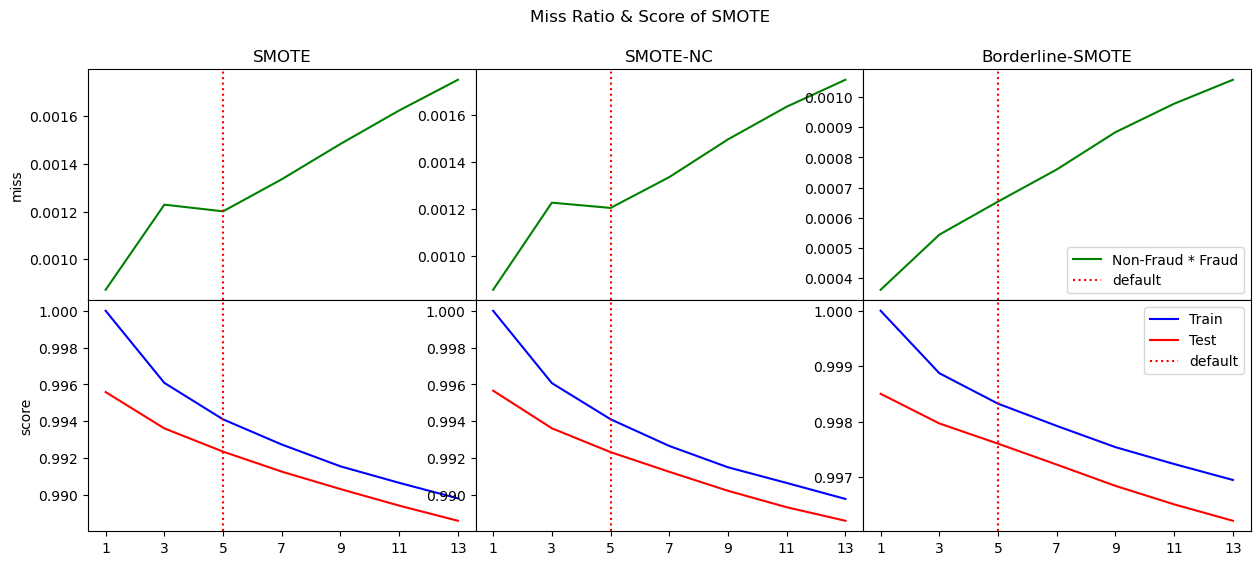

In [56]:
smote_t = [[x * y for x, y in zip(smote_nf[n], smote_f[n])] for n in range(3)]

fig, axes = plt.subplots(2, 3, sharex=True, figsize=(15, 6))
for i in range(3):
    axes[0, i].plot(smote_t[i], 'g', label='Non-Fraud * Fraud')
    axes[0, i].set_title(s_strategy[i])
    axes[0, i].set_xticks([*range(len(neighbors))])
    axes[0, i].set_xticklabels(neighbors)
    axes[0, i].axvline(x=2, color='r', linestyle=':', label='default')
for i in range(3):
    axes[1, i].plot(smote_train_score[i], 'b', label='Train')
    axes[1, i].plot(smote_test_score[i], 'r', label='Test')
    axes[1, i].set_xticks([*range(len(neighbors))])
    axes[1, i].set_xticklabels(neighbors)
    axes[1, i].axvline(x=2, color='r', linestyle=':', label='default')

fig.suptitle("Miss Ratio & Score of SMOTE")
axes[0, 1].set_xlabel("n_neighbors")
axes[0, 0].set_ylabel("miss")
axes[1, 0].set_ylabel('score')
axes[0, 2].legend()
axes[1, 2].legend()

plt.subplots_adjust(wspace=0, hspace=0)

**SMOTE 사용시 Miss Ratio와 Score**

SMOTE와 SMOTE-NC는 거의 동일한 모습을 보임. 특이하게 n_neighbors가 5일 때 Miss Ratio가 소폭 감소함.\
Borderline-SMOTE의 경우 train/test score의 간격이 나머지보다 커보이지만, 축척이 통일되지 않아 그렇게 보이는 것 뿐임.\
실제로는 점수 차가 셋 중 가장 적음.\
또한 Miss Ratio도 셋 중 가장 적음.

허나 n_neighbors의 값이 1이면 과대적합이 발생할 것 같은데... 점수도 높고 miss ratio도 가장 적다.

## 7. Conclusion

Oversampling, Undersampling, SMOTE를 비교해 보았을 때,\
Undersampling을 이용한 모델이 가장 성능이 낮았고, Oversampling을 이용한 모델의 성능이 가장 좋았음.

단, Miss Ratio를 같이 고려할 경우 (그래프 뿐 아니라 Matrix를 함께 고려) SMOTE 알고리즘이 더 바람직했음.

이에 SMOTE-NC에서 n_neighbors = 5인 경우를 최적의 모델로 선택함.